## Dodani stop-words in Classla predprocesiranje

Na podlagi analize podatkov o posameznih kategorijah in pripadajočih besedah, sva naredila obsežen seznam besed, ki sva jih jih v procesu predprocesiranja dodala slovenskim stop-words iz NLTK korpusa. Korake predprocesiranja, ki sva jih določila v prejšnji fazi, sva združila v funkcijo, ki prejme celoten dataframe.

Naslednji korak v predprocesiranju je bil dodajanje koraka s Classla knjižnjico, ki zmore posegati v slovensko besedišče - iz tega sva izluščila slovenske lemme. Za primerjavo besedišča iz prejšnje faze sva ponovno izvozila enak format pogostosti besed (graf + tabelarni zapis). Na podlagi tega koraka sva še enkrat pognala prej uporabljene modele, da sva lahko primerjala do kolikšnega izboljšanja sta doprinesla procesa dodanih stop words in Classla procesa. Zaradi časovne zahtevnosti Classla predprocesiranja sva izvozila nov podatkovni okvir, ki sva ga uporabljala v naslednjih fazah.

In [ ]:
#Stop-words dodani po analizi podatkov

add_stopwords = ["xd", "font", "div", "pt", "br", "url", "msonormal" ,
                     "ceefdcbbfdee", "cunknown", "cinfo", "img", "sdata", "size", 
                     "com", "nbsp", "the", "html", "fwww", "serif", "https",
                     "margin", "text", "http", "border", "this", "head", "align",
                     "tr", "of", "meta", "sans","px", "nbsp", "quot", "reserved",
                     "style", "span", "data", "text", "height", "windowtext",
                     "width", "padding", "bottom", "nowrap", "left", "top", "px",
                     "td", "line", "valign", "fgpw", "dir", "top", "vertical",
                     'class', 'family', 'color', 'content', 'calibri', 'charset', 
                     'body',  'utf', 'rgb', 'fff', 'background', 'mail', 'ltr',
                     'right', 'type', 'amp', 'equiv', 'helvetica', 'www', 'solid',
                     'bgcolor', 'fd', 'from', 'arial', 'and', 'wordsection', 'type',
                     '\u200c', "id", "lang","medium","microsoft","generator",
                     "generator microsoft","triglav","pozdravljeni","lep","prosim",
                     "pozdrav","lp","lep pozdrav","slaa","hvala",
                     'aleš', 'alt', 'any', 'anže', 'are', 'as', 'ascii', 'attr', 
                     'auto', 'be', 'by', 'cac', 'cadadbdd', 'cdbebadde', 'cellpadding', 
                     'cellspacing', 'center', 'cm', 'david', 'ddv', 'de', 'decoration',
                     'display', 'edc', 'elektronsko', 'email', 'fax', 'facebook', 
                     'fclick', 'fdoc', 'for', 'forwarded', 'ftriglavgroup', 'fu', 
                     'gmail', 'header',  'href', 'if', 'important', 'instagram', 
                     'intended', 'is', 'jpg','jun', 'li', 'link', 'linkedin', 
                     'ljubljana', 'ltd', 'lucian', 'manage', 'max', 'may', 'message',
                     'miklošičeva', 'naslov', 'neue', 'new', 'no', 'none', 'not', 
                     'obveščamo', 'open', 'or', 'ownership', 'php', 'please', 'png', 
                     'prod', 'prosimo', 'pv','quote', 'rakić', 'sendername', 'sent',
                     'share', 'sintja', 'sl', 'slo', 'slovenija', 'sporočilo', 
                     'spoštovani', 'src','stojko', 'subject', 'summit', 'table', 
                     'tbody', 'tel', 'triglav', 'triglavcaps', 'twitter', 'unsubscribe', 
                     'us', 'utm', 'več', 'vl', 'we', 'with', 'word', 'you', 'your', 
                     'youtube', 'zavarovalnica', '©', '·', 'št', '–', '•',
                     'ccfaeceaddbb',"int", "osp", "oz","zavarovalnice", "will","source",
                     "list","null","pm","am","itriglav", "will","recipient","it",
                     "logo","our","recieved", "confidential", "source", "info",
                     "at", "have", "attachments", "sender", "before", "vsebovredu",
                     "undefined","€", "insurance","int", "osp", "oz","zavarovalnice", 
                     "will","source","list","null","pm","am","itriglav",
                     "recipient","it","logo","our","recieved", "confidential",
                     "source", "info","at", "have", "attachments", "sender", "before", 
                     "vsebovredu", "undefined","€", "insurance", "es","lahko",
                     "employee","list","ftrack","have","all","at","eu","it",
                     "»","fem","strong","was","rsteam","aspx","shash","strong",
                     "originalsrc","let","spacing","avast","justify","oz",
                     'zfppipp','st','davčna','zavarovanja','zavarovanje', 'polica', 
                     'police', 'račun','lepo', 'eur','dne','polici','spoštovanjem',
                     'informacijo', 'fw', 'can', 'fcompany','information','fmaps',
                     'google', 'fq','regards','printing','that','notify']

In [1]:
import pandas as pd
import os
import nltk
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktTrainer
from nltk.corpus import stopwords
import re
import string

import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle

import logging
from numpy import random
import gensim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from bs4 import BeautifulSoup
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier

import seaborn as sns

In [ ]:
df = pd.read_csv ("zdruzeni_podatki.csv")

In [ ]:
nlp = classla.Pipeline('sl', processors='tokenize,ner,pos,lemma,depparse')
def klasla(text):
    token = []                  
    doc = nlp(text) 

    for sent in doc.sentences:
        for word in sent.words:
            token.append(word.lemma)
            

    return token

In [ ]:
def preprocess(df):
    
    #SPREMENI NaN V CLASS "BREZ"
    df = df.fillna("Nedefinirano_polje")
    #VRŽI IZ DF VSE, KI IMAJO CLASS "BREZ"
    df = df.loc[~df["class"].str.contains("Nedefinirano_polje")]
    
    #VRŽI VEN MAILE BREZ VSEBINE
    df = df.loc[~df["content"].str.contains("Nedefinirano_polje")]
    
    #Vrži ven "unnamed
    df = df.drop(columns=["Unnamed: 0"])
    
    
    #REMOVING WEBSITES FROM STRINGS
    #df['tokenized'] = df['tokenized'].apply(lambda x: re.sub(r'^https?:\/\/.*[\r\n]*', '', x))
    df['tokenized'] = df['content'].apply(lambda x: re.sub(r"(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*", '', x))

    #REMOVING EMAIL ADRESSES FROM STRINGS USING REGEX
    df['tokenized'] = df['tokenized'].apply(lambda x: re.sub('\S*@\S*\s?', '' , x))
    
    #LOWER-CASING NO_STOPWORDS COLUMN
    df["tokenized"] = df["tokenized"].str.lower()
    
    #STRIPPING NO_STOPWORD COLUMN
    df["tokenized"] = df["tokenized"].apply(lambda x: x.strip())
 
    #REMOVING PUNCTUATION
    df['tokenized'] = df['tokenized'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ' , x))

    #REMOVING DIGITS 
    df['tokenized'] = df['tokenized'].apply(lambda x: re.sub('[\d]', "" , x))
    
    #REMOVING SINGLE CHARACTERS FROM NO_DIGITS
    df['tokenized'] = df['tokenized'].apply(lambda x: re.sub(r"\b[a-zA-Z]\b", "" , x))
    
    #REMOVING WORDS LONGER THAN 16 CHARACTERS FROM NO_DIGITS
    df['tokenized'] = df['tokenized'].apply(lambda x: re.sub(r'\b\w{16,100}\b', "" , x))

    #REMOVING WORDS 1-2 CHARACTERS FROM NO_DIGITS
    df['tokenized'] = df['tokenized'].apply(lambda x: re.sub(r'\b\w{1,2}\b', "" , x))

    #DETERMINE SLOVENE STOPWORDS
    slo_stopwords = stopwords.words("slovene")
    
    add_stopwords = ["xd", "font", "div", "pt", "br", "url", "msonormal" ,
                     "ceefdcbbfdee", "cunknown", "cinfo", "img", "sdata", "size", 
                     "com", "nbsp", "the", "html", "fwww", "serif", "https",
                     "margin", "text", "http", "border", "this", "head", "align",
                     "tr", "of", "meta", "sans","px", "nbsp", "quot", "reserved",
                     "style", "span", "data", "text", "height", "windowtext",
                     "width", "padding", "bottom", "nowrap", "left", "top", "px",
                     "td", "line", "valign", "fgpw", "dir", "top", "vertical",
                     'class', 'family', 'color', 'content', 'calibri', 'charset', 
                     'body',  'utf', 'rgb', 'fff', 'background', 'mail', 'ltr',
                     'right', 'type', 'amp', 'equiv', 'helvetica', 'www', 'solid',
                     'bgcolor', 'fd', 'from', 'arial', 'and', 'wordsection', 'type',
                     '\u200c', "id", "lang","medium","microsoft","generator",
                     "generator microsoft","triglav","pozdravljeni","lep","prosim",
                     "pozdrav","lp","lep pozdrav","slaa","hvala",
                     'aleš', 'alt', 'any', 'anže', 'are', 'as', 'ascii', 'attr', 
                     'auto', 'be', 'by', 'cac', 'cadadbdd', 'cdbebadde', 'cellpadding', 
                     'cellspacing', 'center', 'cm', 'david', 'ddv', 'de', 'decoration',
                     'display', 'edc', 'elektronsko', 'email', 'fax', 'facebook', 
                     'fclick', 'fdoc', 'for', 'forwarded', 'ftriglavgroup', 'fu', 
                     'gmail', 'header',  'href', 'if', 'important', 'instagram', 
                     'intended', 'is', 'jpg','jun', 'li', 'link', 'linkedin', 
                     'ljubljana', 'ltd', 'lucian', 'manage', 'max', 'may', 'message',
                     'miklošičeva', 'naslov', 'neue', 'new', 'no', 'none', 'not', 
                     'obveščamo', 'open', 'or', 'ownership', 'php', 'please', 'png', 
                     'prod', 'prosimo', 'pv','quote', 'rakić', 'sendername', 'sent',
                     'share', 'sintja', 'sl', 'slo', 'slovenija', 'sporočilo', 
                     'spoštovani', 'src','stojko', 'subject', 'summit', 'table', 
                     'tbody', 'tel', 'triglav', 'triglavcaps', 'twitter', 'unsubscribe', 
                     'us', 'utm', 'več', 'vl', 'we', 'with', 'word', 'you', 'your', 
                     'youtube', 'zavarovalnica', '©', '·', 'št', '–', '•',
                     'ccfaeceaddbb',"int", "osp", "oz","zavarovalnice", "will","source",
                     "list","null","pm","am","itriglav", "will","recipient","it",
                     "logo","our","recieved", "confidential", "source", "info",
                     "at", "have", "attachments", "sender", "before", "vsebovredu",
                     "undefined","€", "insurance","int", "osp", "oz","zavarovalnice", 
                     "will","source","list","null","pm","am","itriglav",
                     "recipient","it","logo","our","recieved", "confidential",
                     "source", "info","at", "have", "attachments", "sender", "before", 
                     "vsebovredu", "undefined","€", "insurance", "es","lahko",
                     "employee","list","ftrack","have","all","at","eu","it",
                     "»","fem","strong","was","rsteam","aspx","shash","strong",
                     "originalsrc","let","spacing","avast","justify","oz",
                     'zfppipp','st','davčna','zavarovanja','zavarovanje', 'polica', 
                     'police', 'račun','lepo', 'eur','dne','polici','spoštovanjem',
                     'informacijo', 'fw', 'can', 'fcompany','information','fmaps',
                     'google', 'fq','regards','printing','that','notify']
    
 
    
    all_stopwords = slo_stopwords + add_stopwords 
    
    #REMOVE STOPWORDS FROM SLOVENE BASE
    df['tokenized'] = df['tokenized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))
    
    df = df.replace(r'^\s*$', np.NaN, regex=True)
    
    #SPREMENI NaN V CLASS "BREZ"
    df = df.fillna("Nedefinirano_polje")
    #VRŽI VEN MAILE BREZ VSEBINE
    df = df.loc[~df["tokenized"].str.contains("Nedefinirano_polje")]
    
    df.reset_index(drop=True, inplace=True)
    
    #KLASLA
    df["tokenized"] = df["tokenized"].apply(lambda x: klasla(x))
    
    
    return df

In [ ]:
df['tokenized'] = pp_df['tokenized'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ' , x))

In [ ]:
df.to_csv(r'\after klasla.csv', index = False)

## Uvažanje novo-izvoženih podatkov

In [2]:
df = pd.read_csv ("after_klasla.csv")

In [3]:
df['detoken'] = df['tokenized'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ' , x))

In [4]:
df

,class,content,tokenized,detoken
0,Asistenca,"Obveščamo vas, da je od kreiranja primera CUDV...","['kreiranje', 'primer', 'cudv', 'črn', 'korošk...",kreiranje primer cudv črn korošk...
1,Asistenca,"Obveščamo vas, da je od kreiranja primera DAVI...","['kreiranje', 'primer', 'seč', 'vprašanje', 'p...",kreiranje primer seč vprašanje p...
2,Asistenca,vv\n\nOd: arc@assist-austria.com <arc@assist-a...,"['poslan', 'četrtek', 'januar', 'zadevati', 'e...",poslan četrtek januar zadevati e...
3,Asistenca,"Obveščamo vas, da je od kreiranja primera ALEŠ...","['kreiranje', 'primer', 'ruter', 'vprašanje', ...",kreiranje primer ruter vprašanje ...
4,Asistenca,"Obveščamo vas, da je od kreiranja primera SUMM...","['kreiranje', 'primer', 'leasing', 'vprašanje'...",kreiranje primer leasing vprašanje ...
...,...,...,...,...
35693,Življenje,"<html><head>_x000D_\n<meta http-equiv=""Content...","['zanimati', 'možnost', 'dobiti', 'izplačan', ...",zanimati možnost dobiti izplačan ...
35694,Življenje,"<html><head>_x000D_\n<meta http-equiv=""Content...","['zanimati', 'kdaj', 'poteči', 'zavarovalen', ...",zanimati kdaj poteči zavarovalen ...
35695,Življenje,Pozdravljeni\nProsim za podatek kdaj lahko dob...,"['podatek', 'kdaj', 'dobiti', 'izplačan', 'sre...",podatek kdaj dobiti izplačan sre...
35696,Življenje,"Pozdravljeni,\n\ndo 31.12. mi je moj prejšnji ...","['prejšnji', 'delodajalec', 'vplačevati', 'skl...",prejšnji delodajalec vplačevati skl...


In [9]:
#IZVOZ TABELE
#DETOKENIZACIJA in FREQUENCY ANALIZA DETOKENIZED POJAVNOSTI
#FUNKCIJA PREJME DATAFRAME Z RAZREDI IN DETOKENIZIRANIMI BESEDAMI - DRUG COLUMN JE SEZNAM BESED

def df_to_plots_table(vnos):
    
    
    df['detoken'] = df['detoken'].apply(lambda x: " ".join(x.split()))
    vnos = vnos.drop(columns=["content", "tokenized"])
    
    
    
    #SPODNJA VRSTICA SPREMENI DATAFRAME V SLOVAR, KJER SO RAZREDU KLJUČI, VREDNOSTI PA VSE BESEDE
    slovar = vnos.groupby('class').apply(lambda dfg: dfg.drop('class', axis=1).to_dict(orient='list')).to_dict()
    
    from nltk.probability import FreqDist
    import matplotlib
    from matplotlib import pyplot as plt
    from matplotlib.font_manager import FontProperties

    
    %matplotlib inline
    
    my_tags= ['Asistenca',
             'Asistenca brez primera',
             'Banke',
             'CORIS',
             'Drajv',
             'GDPR',
             'Help desk - interna javnost',
             'Marketinške akcije',
             'Odjava B2B',
             'PDPZ',
             'Premoženje',
             'Zavarovanja - zunanji partnerji',
             'Zdravje',
             'drugo',
             'Življenje']
    
    for oznaka in my_tags:
        print(oznaka)
        seznam = (slovar[oznaka][vnos.columns[1]])
        besedilo = " ".join(seznam)
        besedilo = besedilo.split(" ")
        
        fdist = FreqDist()
        for beseda in besedilo:
            fdist[beseda]+=1
        
        
        fig = plt.figure(figsize=(22, 10))
        plt.title(oznaka)
        slika = fdist.plot(60)
        fdist_top60 = fdist.most_common(20)
        
        
        N = 8
        
        figa, ax1 = plt.subplots(figsize=(6, 2 + N / 2.5))
        title = oznaka
        ax1.set_title(f'{title}', weight='bold', size=14, color='k')
        
        table = plt.table(cellText = fdist_top60, 
                          colLabels = ('Beseda', 'Pojavnost'),
                          loc='center',
                          cellLoc='center')
        
        for (row, col), cell in table.get_celld().items():
            if (row == 0):
                cell.set_text_props(fontproperties=FontProperties(weight='bold'))
        
        table.set_fontsize(8)
        ax1.axis('off')
        
        plt.axis('off')
        plt.grid('off')
          
        #prepare for saving:
        # draw canvas once
        plt.gcf().canvas.draw()
        # get bounding box of table
        points = table.get_window_extent(plt.gcf()._cachedRenderer).get_points()
        # add 10 pixel spacing
        points[0,:] -= 10; points[1,:] += 10
        # get new bounding box in inches
        nbbox = matplotlib.transforms.Bbox.from_extents(points/plt.gcf().dpi)
             
        # save and clip by new bounding box
        plt.savefig(oznaka+"_0530_postclassla_table.jpg", dpi=200, bbox_inches='tight')
        
        print(slika)
        print(fdist_top60)
        fig.savefig(oznaka + '_0530_postclassla.jpg',dpi=300)
        
        


Asistenca


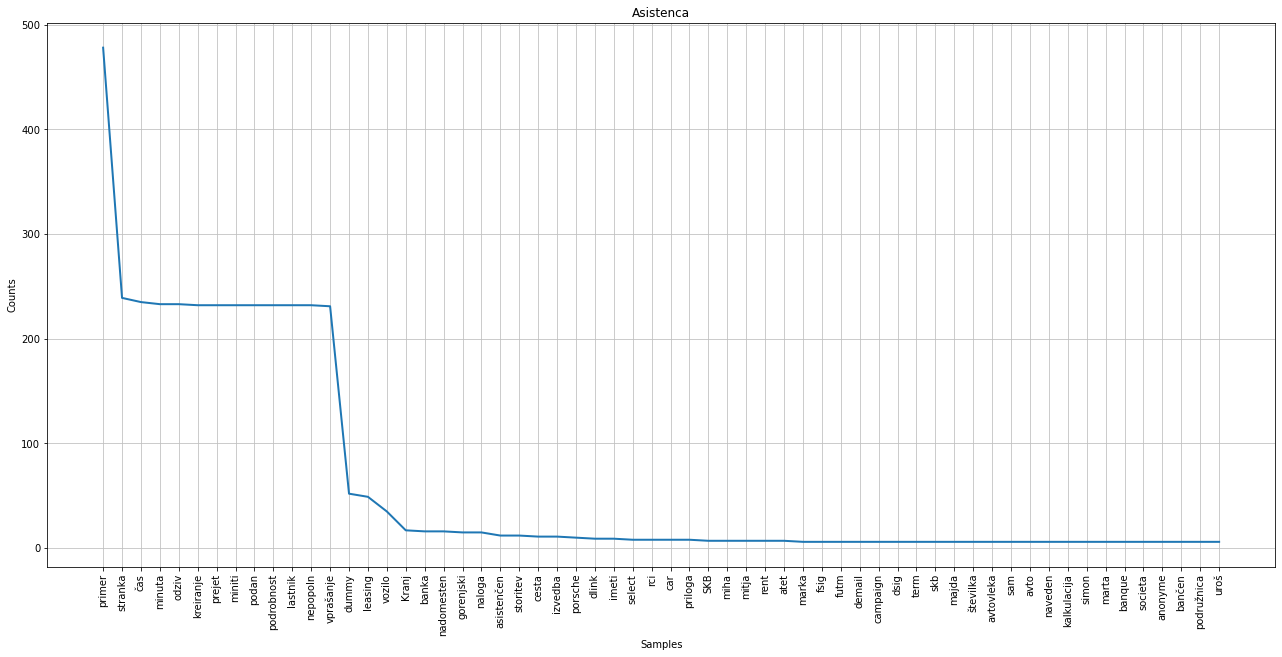

AxesSubplot(0.125,0.125;0.775x0.755)
[('primer', 478), ('stranka', 239), ('čas', 235), ('minuta', 233), ('odziv', 233), ('kreiranje', 232), ('prejet', 232), ('miniti', 232), ('podan', 232), ('podrobnost', 232), ('lastnik', 232), ('nepopoln', 232), ('vprašanje', 231), ('dummy', 52), ('leasing', 49), ('vozilo', 35), ('Kranj', 17), ('banka', 16), ('nadomesten', 16), ('gorenjski', 15)]
Asistenca brez primera


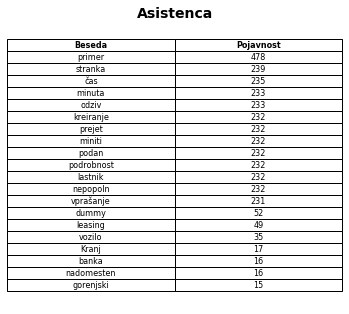

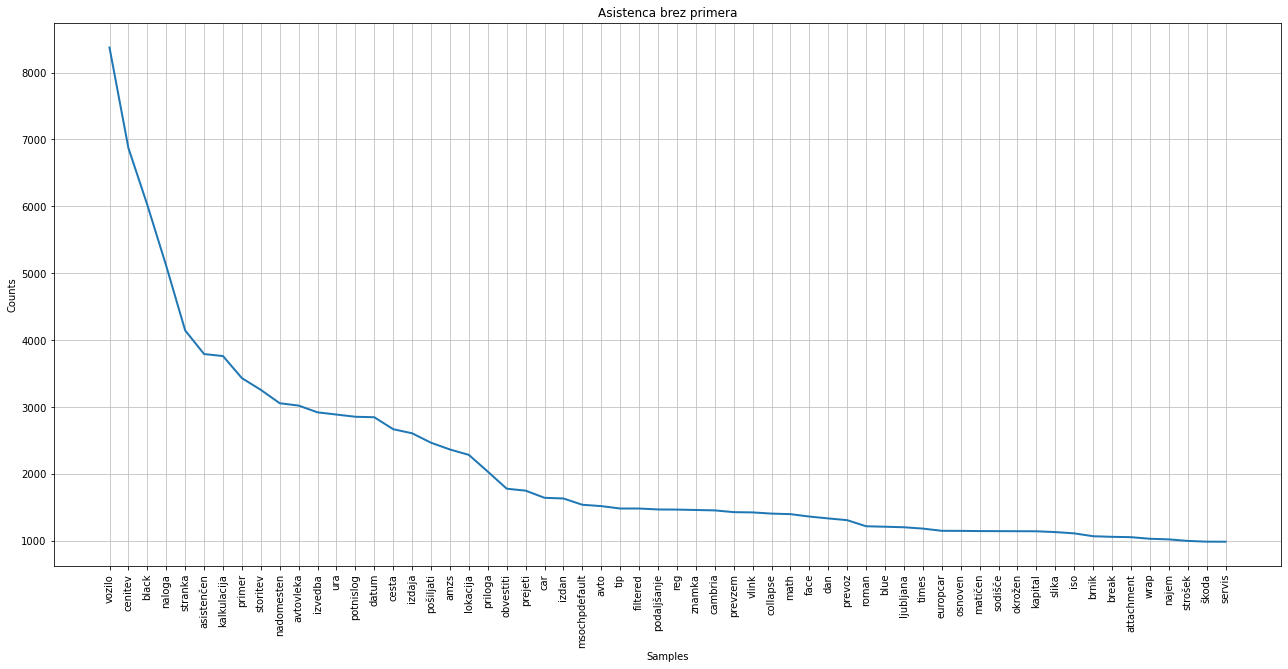

AxesSubplot(0.125,0.125;0.775x0.755)
[('vozilo', 8374), ('cenitev', 6872), ('black', 6022), ('naloga', 5111), ('stranka', 4147), ('asistenčen', 3794), ('kalkulacija', 3764), ('primer', 3434), ('storitev', 3259), ('nadomesten', 3059), ('avtovleka', 3024), ('izvedba', 2923), ('ura', 2890), ('potnislog', 2857), ('datum', 2850), ('cesta', 2671), ('izdaja', 2610), ('pošiljati', 2469), ('amzs', 2368), ('lokacija', 2287)]
Banke


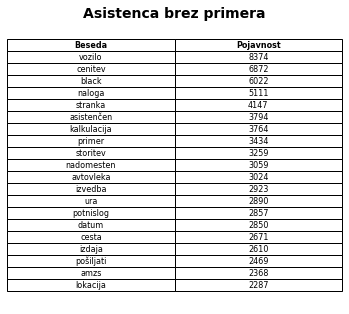

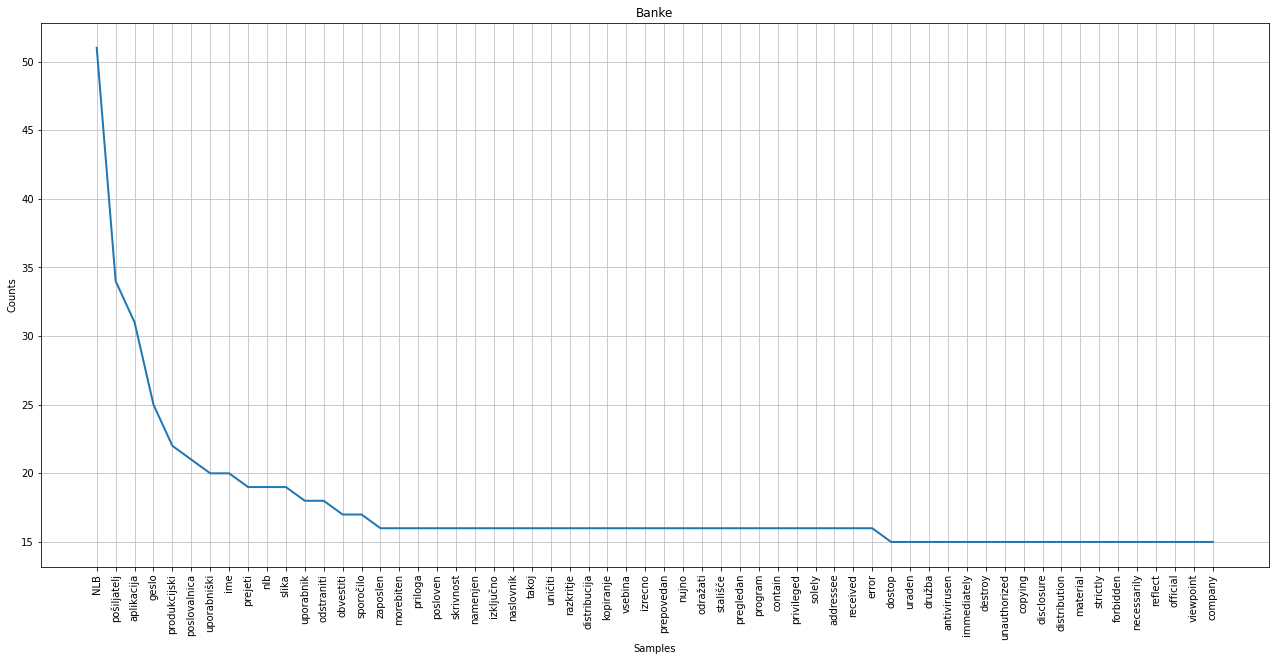

AxesSubplot(0.125,0.125;0.775x0.755)
[('NLB', 51), ('pošiljatelj', 34), ('aplikacija', 31), ('geslo', 25), ('produkcijski', 22), ('poslovalnica', 21), ('uporabniški', 20), ('ime', 20), ('prejeti', 19), ('nlb', 19), ('slika', 19), ('uporabnik', 18), ('odstraniti', 18), ('obvestiti', 17), ('sporočilo', 17), ('zaposlen', 16), ('morebiten', 16), ('priloga', 16), ('posloven', 16), ('skrivnost', 16)]
CORIS


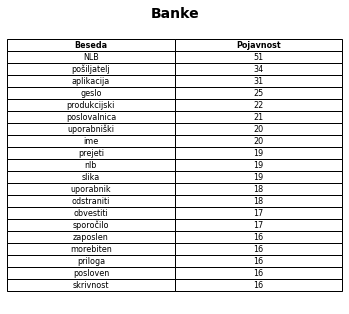

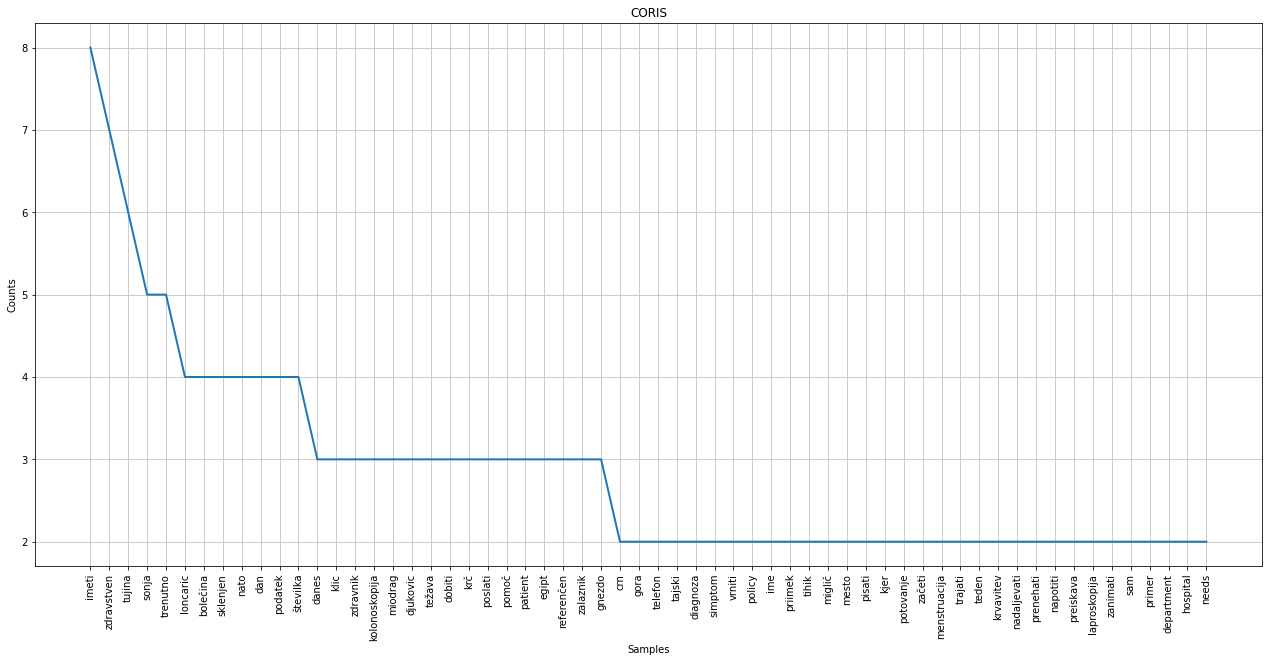

AxesSubplot(0.125,0.125;0.775x0.755)
[('imeti', 8), ('zdravstven', 7), ('tujina', 6), ('sonja', 5), ('trenutno', 5), ('loncaric', 4), ('bolečina', 4), ('sklenjen', 4), ('nato', 4), ('dan', 4), ('podatek', 4), ('številka', 4), ('danes', 3), ('klic', 3), ('zdravnik', 3), ('kolonoskopija', 3), ('miodrag', 3), ('djukovic', 3), ('težava', 3), ('dobiti', 3)]
Drajv


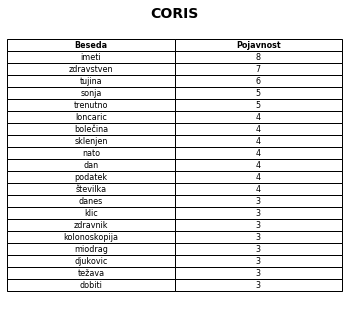

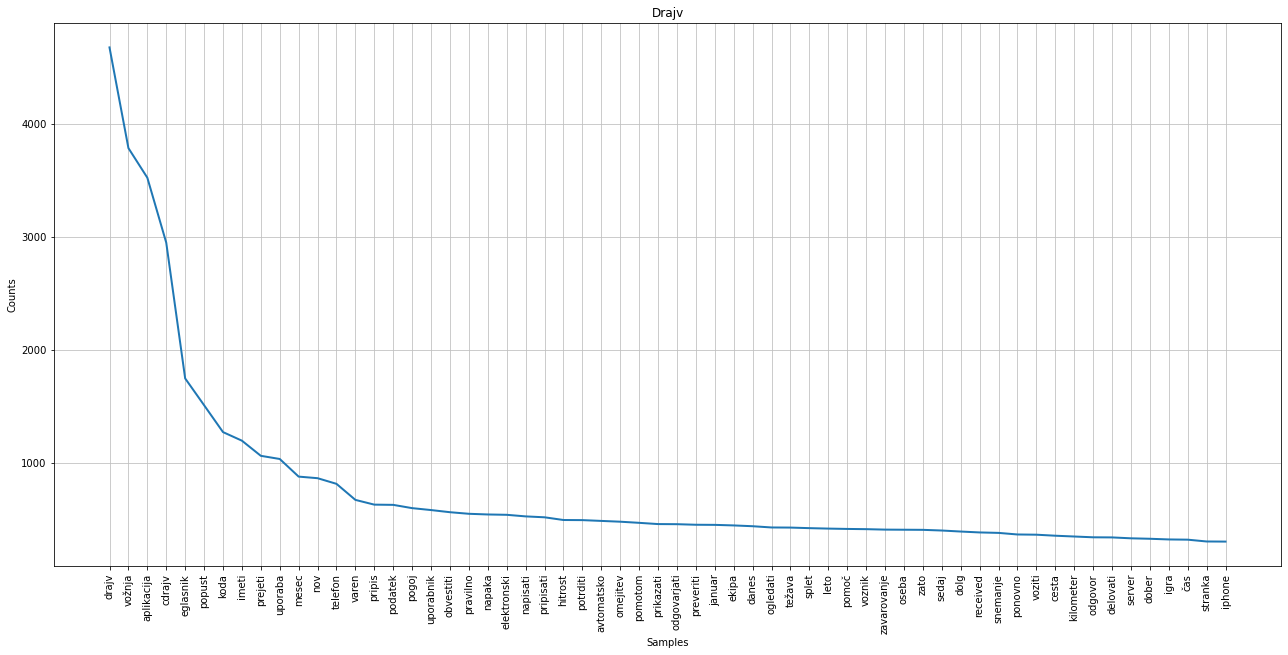

AxesSubplot(0.125,0.125;0.775x0.755)
[('drajv', 4676), ('vožnja', 3785), ('aplikacija', 3523), ('cdrajv', 2948), ('eglasnik', 1747), ('popust', 1510), ('koda', 1272), ('imeti', 1196), ('prejeti', 1062), ('uporaba', 1034), ('mesec', 878), ('nov', 864), ('telefon', 814), ('varen', 672), ('pripis', 630), ('podatek', 628), ('pogoj', 599), ('uporabnik', 582), ('obvestiti', 563), ('pravilno', 549)]
GDPR


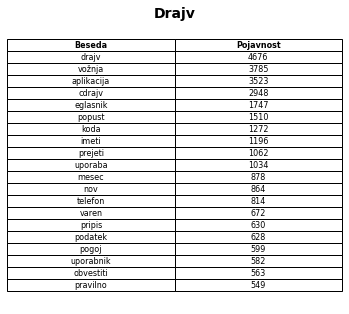

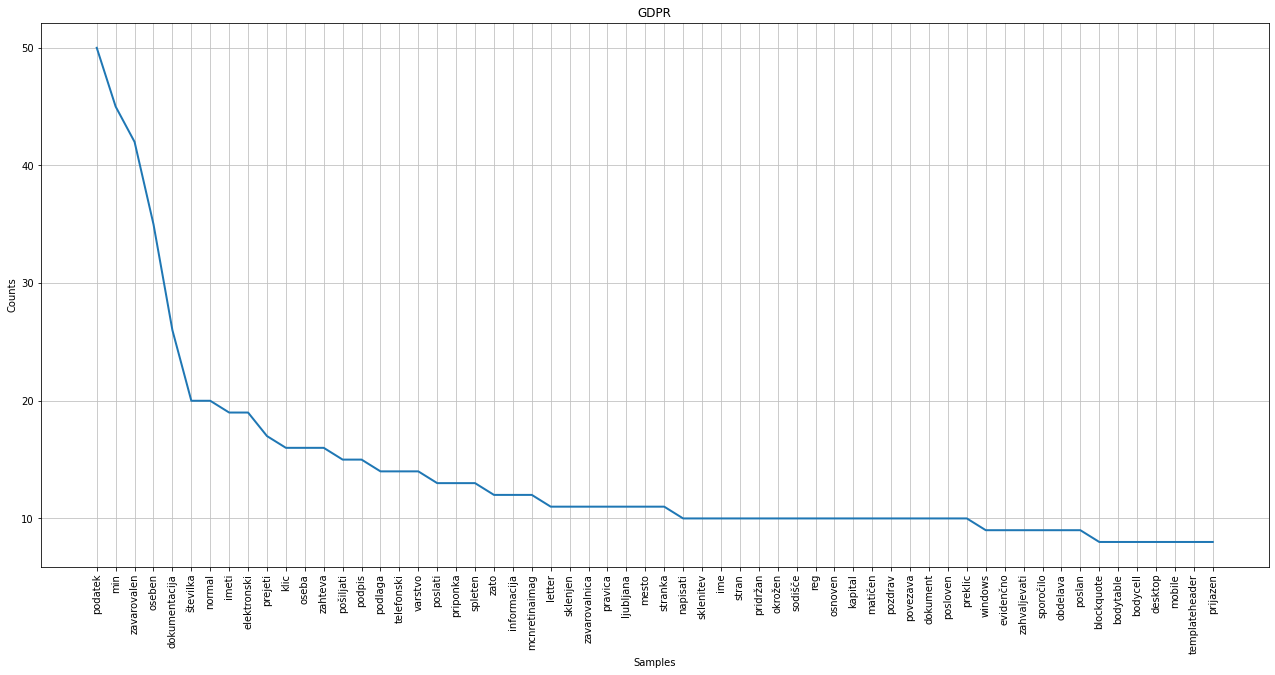

AxesSubplot(0.125,0.125;0.775x0.755)
[('podatek', 50), ('min', 45), ('zavarovalen', 42), ('oseben', 35), ('dokumentacija', 26), ('številka', 20), ('normal', 20), ('imeti', 19), ('elektronski', 19), ('prejeti', 17), ('klic', 16), ('oseba', 16), ('zahteva', 16), ('pošiljati', 15), ('podpis', 15), ('podlaga', 14), ('telefonski', 14), ('varstvo', 14), ('poslati', 13), ('priponka', 13)]
Help desk - interna javnost


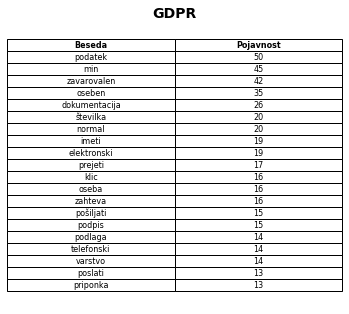

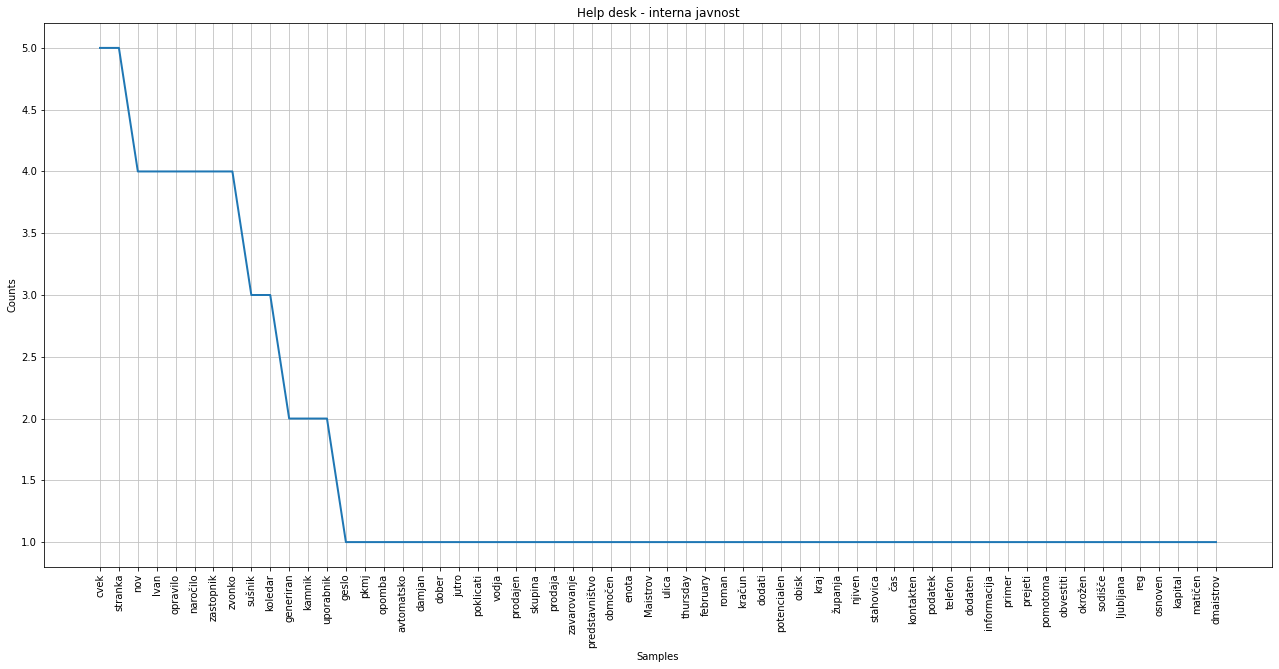

AxesSubplot(0.125,0.125;0.775x0.755)
[('cvek', 5), ('stranka', 5), ('nov', 4), ('Ivan', 4), ('opravilo', 4), ('naročilo', 4), ('zastopnik', 4), ('zvonko', 4), ('sušnik', 3), ('koledar', 3), ('generiran', 2), ('kamnik', 2), ('uporabnik', 2), ('geslo', 1), ('pkmj', 1), ('opomba', 1), ('avtomatsko', 1), ('damjan', 1), ('dober', 1), ('jutro', 1)]
Marketinške akcije


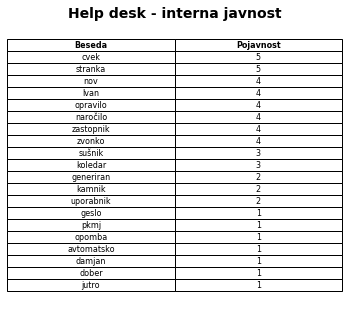

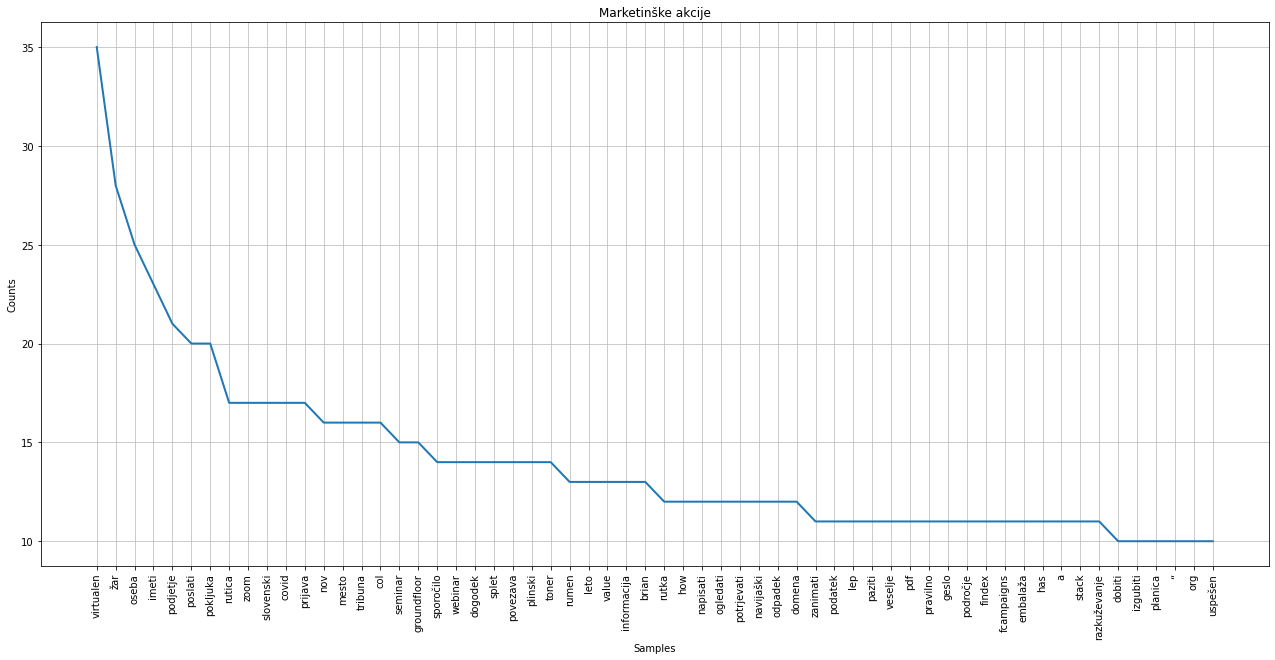

AxesSubplot(0.125,0.125;0.775x0.755)
[('virtualen', 35), ('žar', 28), ('oseba', 25), ('imeti', 23), ('podjetje', 21), ('poslati', 20), ('pokljuka', 20), ('rutica', 17), ('zoom', 17), ('slovenski', 17), ('covid', 17), ('prijava', 17), ('nov', 16), ('mesto', 16), ('tribuna', 16), ('col', 16), ('seminar', 15), ('groundfloor', 15), ('sporočilo', 14), ('webinar', 14)]
Odjava B2B


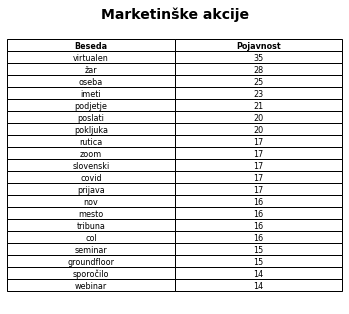

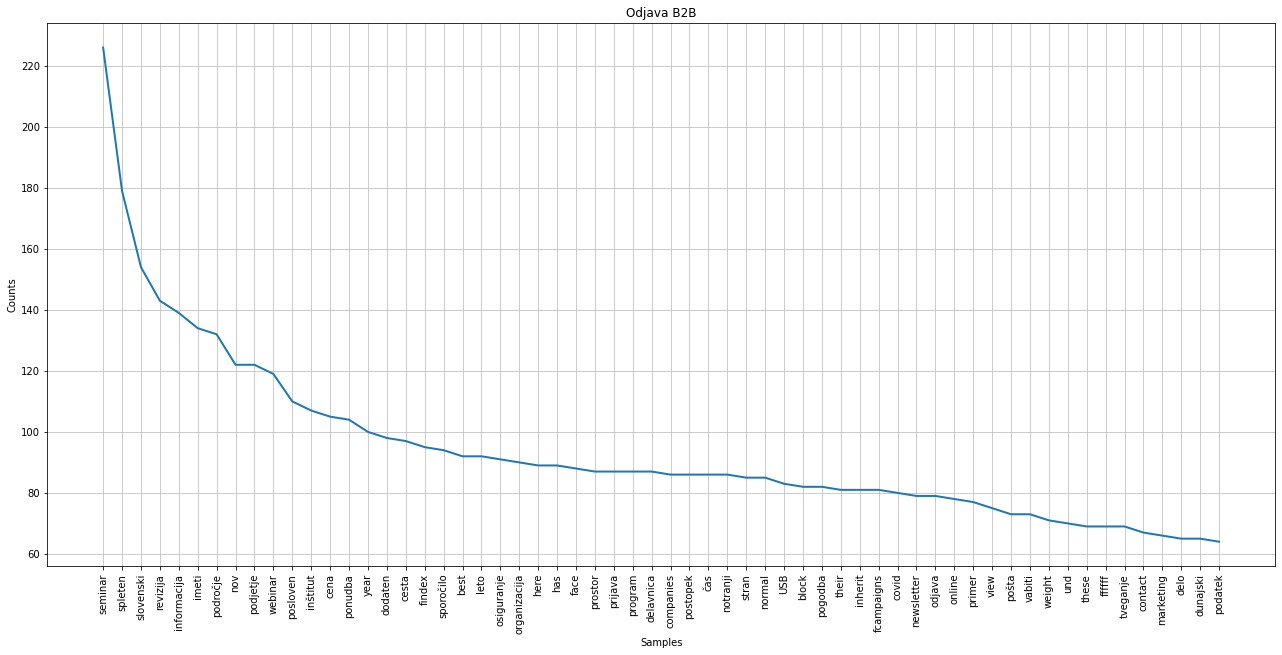

AxesSubplot(0.125,0.125;0.775x0.755)
[('seminar', 226), ('spleten', 179), ('slovenski', 154), ('revizija', 143), ('informacija', 139), ('imeti', 134), ('področje', 132), ('nov', 122), ('podjetje', 122), ('webinar', 119), ('posloven', 110), ('inštitut', 107), ('cena', 105), ('ponudba', 104), ('year', 100), ('dodaten', 98), ('cesta', 97), ('findex', 95), ('sporočilo', 94), ('best', 92)]
PDPZ


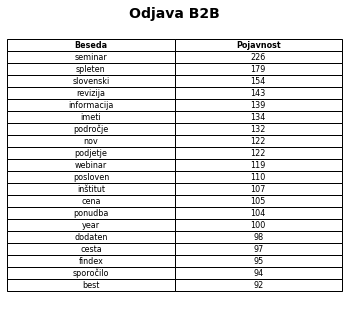

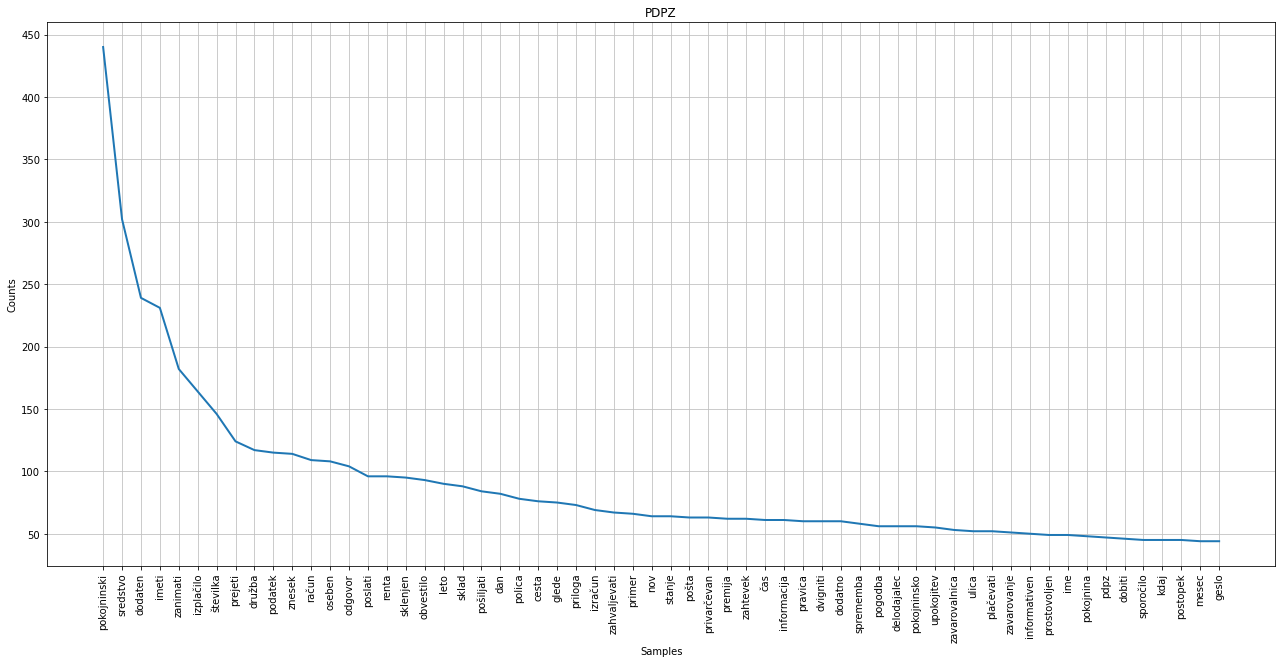

AxesSubplot(0.125,0.125;0.775x0.755)
[('pokojninski', 440), ('sredstvo', 302), ('dodaten', 239), ('imeti', 231), ('zanimati', 182), ('izplačilo', 164), ('številka', 146), ('prejeti', 124), ('družba', 117), ('podatek', 115), ('znesek', 114), ('račun', 109), ('oseben', 108), ('odgovor', 104), ('poslati', 96), ('renta', 96), ('sklenjen', 95), ('obvestilo', 93), ('leto', 90), ('sklad', 88)]
Premoženje


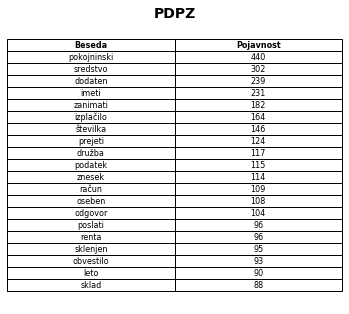

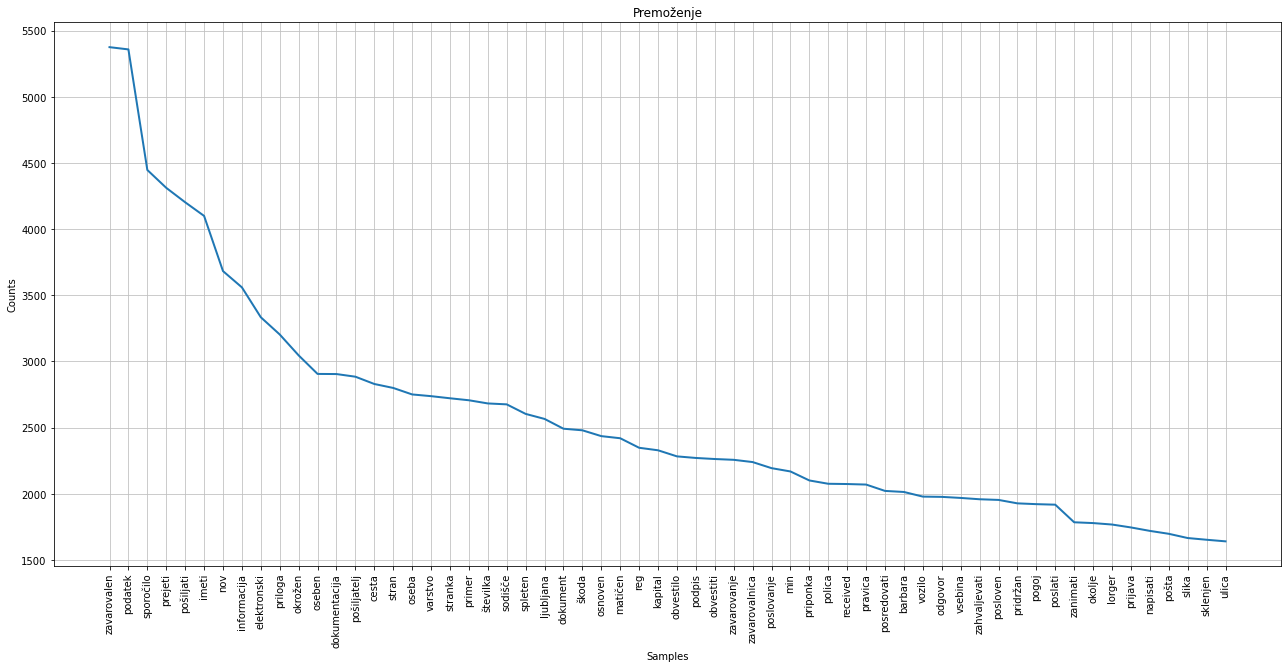

AxesSubplot(0.125,0.125;0.775x0.755)
[('zavarovalen', 5375), ('podatek', 5358), ('sporočilo', 4447), ('prejeti', 4312), ('pošiljati', 4203), ('imeti', 4100), ('nov', 3683), ('informacija', 3560), ('elektronski', 3334), ('priloga', 3204), ('okrožen', 3046), ('oseben', 2906), ('dokumentacija', 2905), ('pošiljatelj', 2885), ('cesta', 2830), ('stran', 2800), ('oseba', 2751), ('varstvo', 2738), ('stranka', 2722), ('primer', 2707)]
Zavarovanja - zunanji partnerji


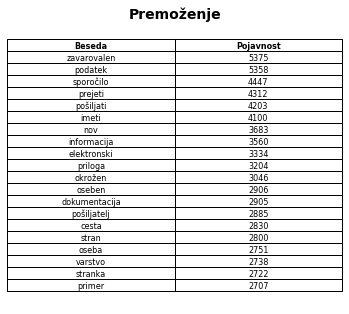

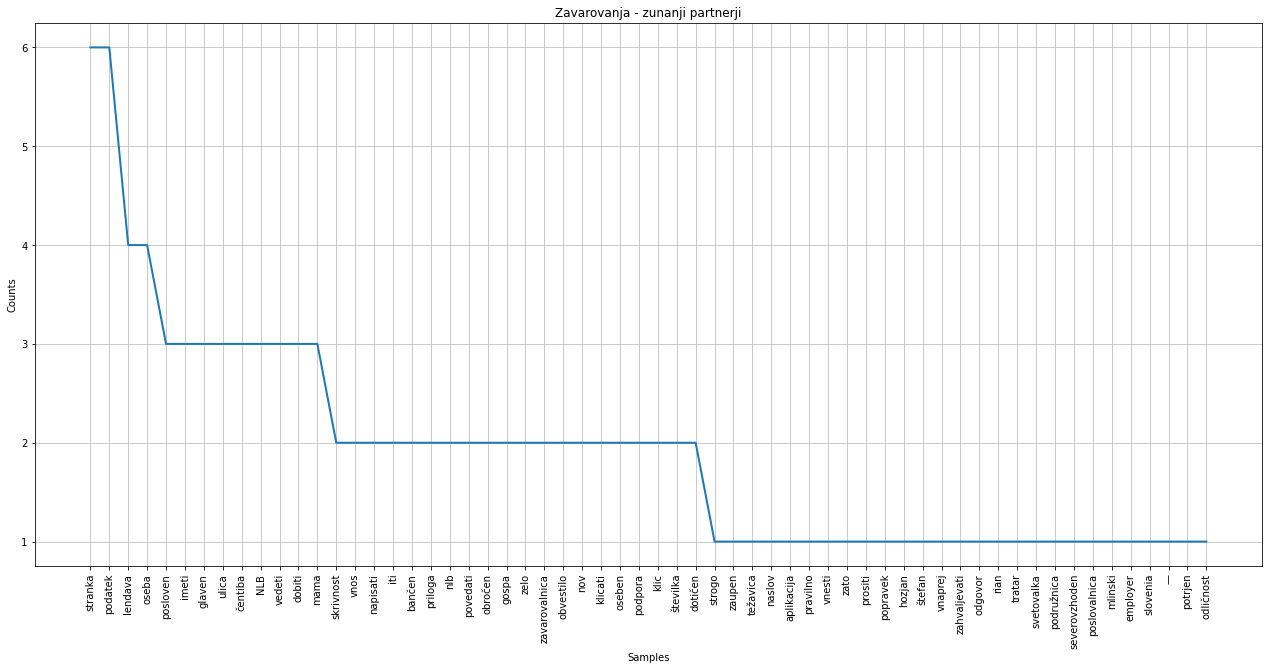

AxesSubplot(0.125,0.125;0.775x0.755)
[('stranka', 6), ('podatek', 6), ('lendava', 4), ('oseba', 4), ('posloven', 3), ('imeti', 3), ('glaven', 3), ('ulica', 3), ('čentiba', 3), ('NLB', 3), ('vedeti', 3), ('dobiti', 3), ('mama', 3), ('skrivnost', 2), ('vnos', 2), ('napisati', 2), ('iti', 2), ('bančen', 2), ('priloga', 2), ('nlb', 2)]
Zdravje


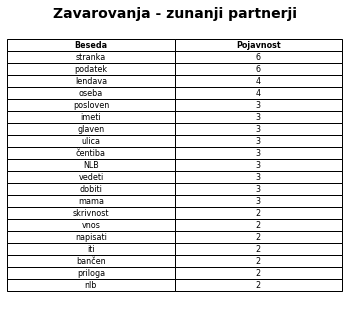

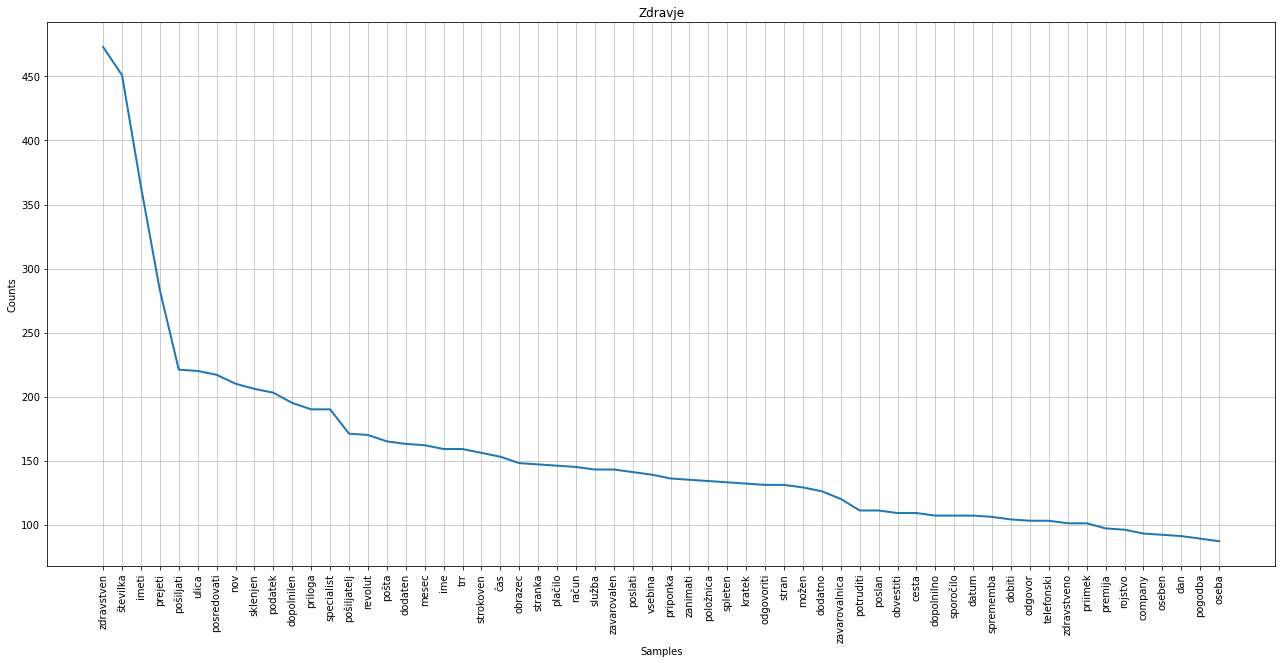

AxesSubplot(0.125,0.125;0.775x0.755)
[('zdravstven', 473), ('številka', 451), ('imeti', 364), ('prejeti', 283), ('pošiljati', 221), ('ulica', 220), ('posredovati', 217), ('nov', 210), ('sklenjen', 206), ('podatek', 203), ('dopolnilen', 195), ('priloga', 190), ('specialist', 190), ('pošiljatelj', 171), ('revolut', 170), ('pošta', 165), ('dodaten', 163), ('mesec', 162), ('ime', 159), ('trr', 159)]
drugo


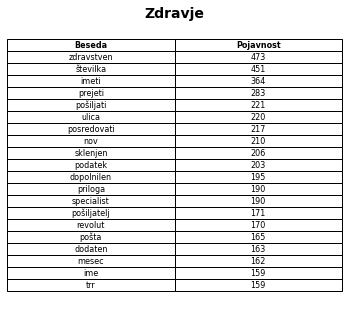

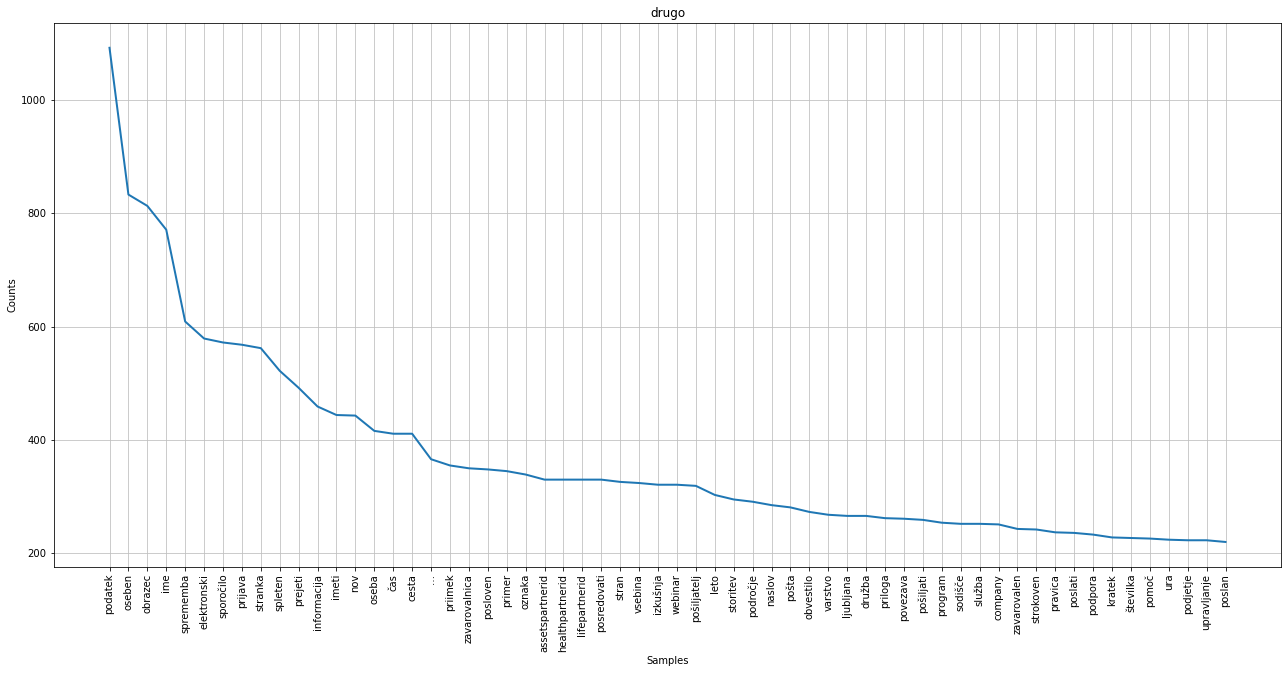

AxesSubplot(0.125,0.125;0.775x0.755)
[('podatek', 1092), ('oseben', 833), ('obrazec', 813), ('ime', 771), ('sprememba', 609), ('elektronski', 579), ('sporočilo', 572), ('prijava', 568), ('stranka', 562), ('spleten', 522), ('prejeti', 492), ('informacija', 459), ('imeti', 444), ('nov', 443), ('oseba', 416), ('čas', 411), ('cesta', 411), ('…', 366), ('priimek', 355), ('zavarovalnica', 350)]
Življenje


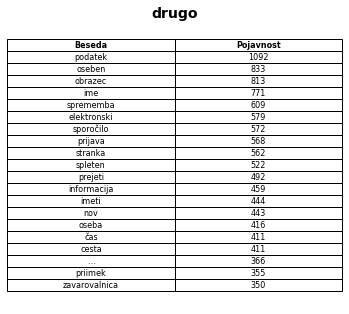

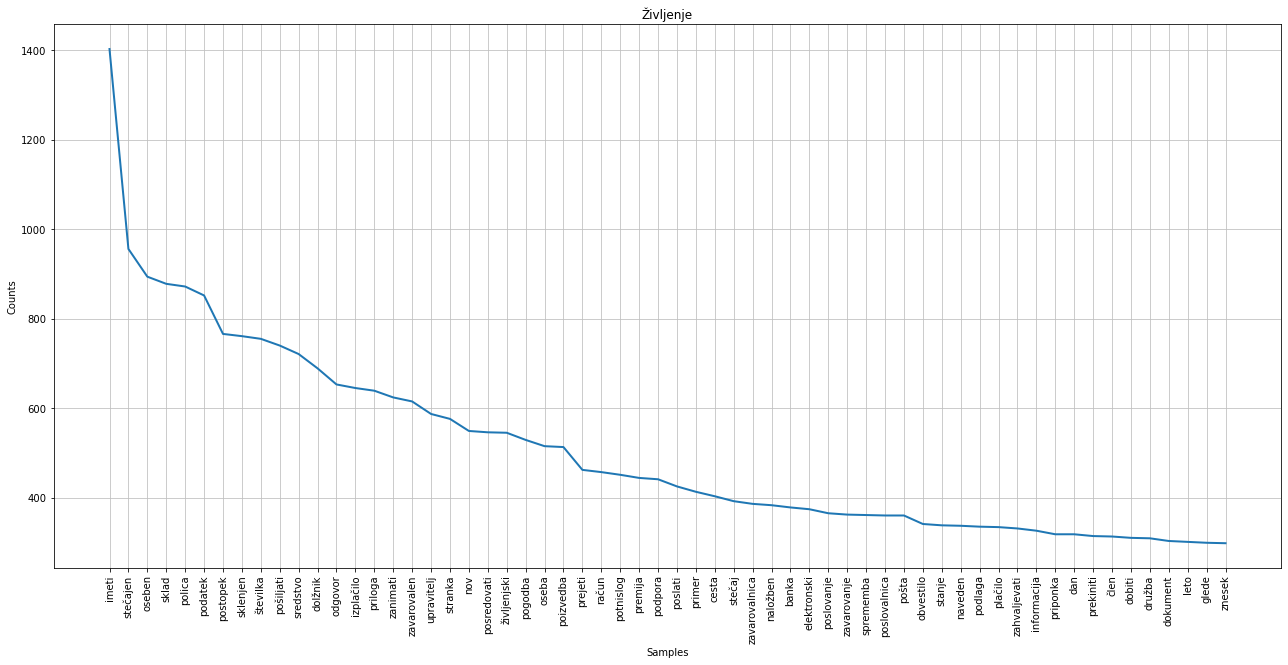

AxesSubplot(0.125,0.125;0.775x0.755)
[('imeti', 1403), ('stečajen', 956), ('oseben', 894), ('sklad', 878), ('polica', 872), ('podatek', 852), ('postopek', 766), ('sklenjen', 761), ('številka', 755), ('pošiljati', 740), ('sredstvo', 721), ('dolžnik', 689), ('odgovor', 653), ('izplačilo', 645), ('priloga', 639), ('zanimati', 624), ('zavarovalen', 615), ('upravitelj', 587), ('stranka', 576), ('nov', 549)]


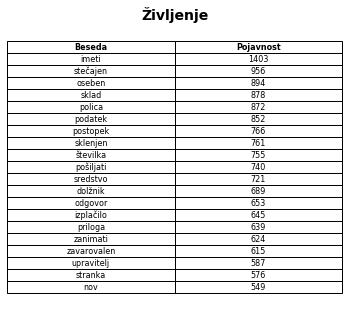

In [10]:
df_to_plots_table(df)

## Ponovno poganjanje modelov

In [11]:
#NASTAVITEV PARAMETROV


my_tags= ['Asistenca',
             'Asistenca brez primera',
             'Banke',
             'CORIS',
             'Drajv',
             'GDPR',
             'Help desk - interna javnost',
             'Marketinške akcije',
             'Odjava B2B',
             'PDPZ',
             'Premoženje',
             'Zavarovanja - zunanji partnerji',
             'Zdravje',
             'drugo',
             'Življenje']

X = df["detoken"]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [12]:
#dummyclassifier

strategies = ['most_frequent', 'stratified', 'uniform', 'constant' ]

test_scores = []
for s in strategies:
	if s =='constant':
		dclf = DummyClassifier(strategy = s, random_state = 0, constant ='Premoženje')
	else:
		dclf = DummyClassifier(strategy = s, random_state = 0)
	dclf.fit(X_train, y_train)
	score = dclf.score(X_test, y_test)
	test_scores.append(score)
    
test_scores

[0.42415754180460064,
 0.2821492233256939,
 0.06400135811900518,
 0.42415754180460064]

In [13]:
%%time

#NAIVE BAYES


from time import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer


nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7237076648841355
                                 precision    recall  f1-score   support

                      Asistenca       1.00      0.38      0.55        88
         Asistenca brez primera       0.97      0.91      0.94      3438
                          Banke       0.00      0.00      0.00         3
                          CORIS       0.00      0.00      0.00         5
                          Drajv       1.00      0.45      0.62       937
                           GDPR       0.00      0.00      0.00        14
    Help desk - interna javnost       0.00      0.00      0.00         1
             Marketinške akcije       0.00      0.00      0.00        18
                     Odjava B2B       0.00      0.00      0.00       124
                           PDPZ       0.00      0.00      0.00       179
                     Premoženje       0.61      0.99      0.75      4997
Zavarovanja - zunanji partnerji       0.00      0.00      0.00         1
                      

/Users/Intragalactic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Intragalactic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Intragalactic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [14]:
%%time
#LINEAR SUPPORT VECTOR


from sklearn.linear_model import SGDClassifier


sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=45, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7707325354384178


/Users/Intragalactic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Intragalactic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                 precision    recall  f1-score   support

                      Asistenca       1.00      0.83      0.91        88
         Asistenca brez primera       0.96      0.92      0.94      3438
                          Banke       0.00      0.00      0.00         3
                          CORIS       0.00      0.00      0.00         5
                          Drajv       0.97      0.83      0.89       937
                           GDPR       0.00      0.00      0.00        14
    Help desk - interna javnost       0.00      0.00      0.00         1
             Marketinške akcije       0.00      0.00      0.00        18
                     Odjava B2B       0.00      0.00      0.00       124
                           PDPZ       0.54      0.14      0.22       179
                     Premoženje       0.66      0.97      0.79      4997
Zavarovanja - zunanji partnerji       0.00      0.00      0.00         1
                        Zdravje       0.63      0.

/Users/Intragalactic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy 0.8364315423138953


/Users/Intragalactic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Intragalactic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Intragalactic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

                                 precision    recall  f1-score   support

                      Asistenca       0.97      0.83      0.90        88
         Asistenca brez primera       0.97      0.95      0.96      3438
                          Banke       1.00      1.00      1.00         3
                          CORIS       1.00      0.40      0.57         5
                          Drajv       0.97      0.90      0.93       937
                           GDPR       0.00      0.00      0.00        14
    Help desk - interna javnost       0.00      0.00      0.00         1
             Marketinške akcije       0.60      0.33      0.43        18
                     Odjava B2B       0.53      0.33      0.41       124
                           PDPZ       0.71      0.49      0.58       179
                     Premoženje       0.79      0.91      0.84      4997
Zavarovanja - zunanji partnerji       0.00      0.00      0.00         1
                        Zdravje       0.68      0.

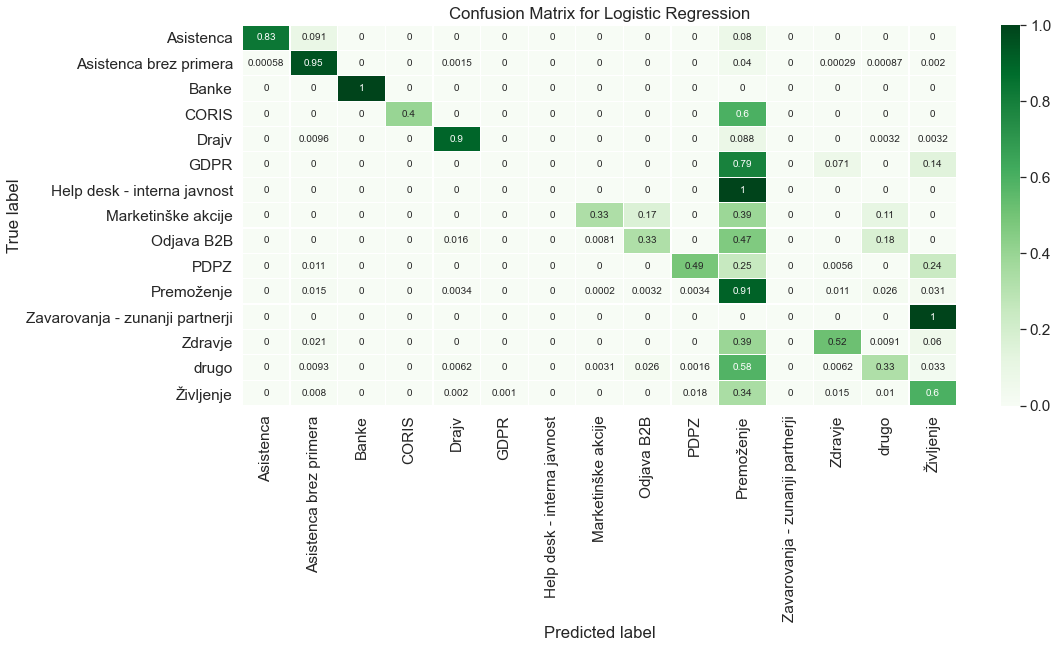

CPU times: user 3.86 s, sys: 320 ms, total: 4.18 s
Wall time: 31.5 s


In [16]:
%%time

#LOGISTIC REGRESSION

import matplotlib
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=-1, C=10,solver='lbfgs', max_iter=100,
                                          )),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = my_tags
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks + 0.5, class_names, rotation=90)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Spodaj je seznam stop words, ki so od poganjanju modela rezultirale v nižji točnosti. Zaradi tega sva jih zaenkrat ohranila v vsebini mailov.

In [ ]:
"""dodatne = [
 'dan', 'danes', 'company','underline'
 'cambria',
 'filtered',
 'msochpdefault',
 'vlink',
 'math',
 'potnislog',
 'break',
 'wrap',
 'zato',
 'strani',
 'informacije',
 'zavarovalnici',
 'cesta',
 'ftwitter',
 'received',
 'contain',
 'immediately',
 'pomotoma',
 'dear',
 'best',
 'received',
 'cesta',
 'reg',
 'environment',
 'iso',
 'contain',
 'ulica',
 'dan',
 'cesta',
 'odgovor',
 'ulica',
 'informacije',
 'zato',
 'environment',
 'strani',
 'dg']"""